# 06_Berlin_Housing_Market_Prediction - Preisvorhersage
## 🤖 Machine Learning für den Berliner Wohnungsmarkt

### 🎯 **Projektübersicht**
Dieses Notebook konzentriert sich auf die Erstellung von Machine-Learning-Modellen zur Vorhersage von Mietpreisen in Berlin. Es baut auf den bereinigten Daten aus der Pipeline auf.

1. **01_Clean_Dataset_2018_2019.ipynb** ✅
2. **02_Clean_Dataset_2022.ipynb** ✅
3. **03_Clean_Dataset_2025.ipynb** ✅
4. **04_Combine_Datasets.ipynb** ✅
5. **05_Housing_Market_Analysis.ipynb** ✅
6. **06_Berlin_Housing_Market_Prediction.ipynb** ← **Dieses Notebook**

### 📊 **Input-Daten**
- **Kombiniertes Dataset:** `data/processed/berlin_housing_combined_enriched_final.csv`

### 🔍 **Analyseziele**
1. **Preisvorhersagemodelle** mit Machine Learning
2. **Feature Importance** Analyse zur Identifikation der wichtigsten Preistreiber
3. **Zeitreihen-Prognose** zur Vorhersage zukünftiger Trends (z.B. für 2030)
4. **Modell-Evaluierung** und Vergleich

## 1. Import Required Libraries

In [16]:
# Datenmanipulation und -analyse
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisierung
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistik und Machine Learning
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Datum und Zeit
from datetime import datetime

# Konfiguration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)
plt.style.use('seaborn-v0_8')

print("Alle Bibliotheken erfolgreich importiert!")
print(f"Pandas Version: {pd.__version__}")
print(f"Verarbeitung gestartet am: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Alle Bibliotheken erfolgreich importiert!
Pandas Version: 2.3.0
Verarbeitung gestartet am: 2025-07-07 15:30:02


## 2. Laden der Daten

In [17]:
# Lade das finale kombinierte Dataset aus der Pipeline
print("="*80)
print("LADEN DES FINALEN KOMBINIERTEN DATASETS FÜR ML")
df = pd.read_csv('data/processed/berlin_housing_combined_enriched_final.csv')
print("="*80)
print(f"✅ Dataset geladen: {df.shape[0]:,} Zeilen, {df.shape[1]} Spalten")
print(f"📊 Verfügbare Spalten: {list(df.columns)}")
df.head()

LADEN DES FINALEN KOMBINIERTEN DATASETS FÜR ML
✅ Dataset geladen: 17,487 Zeilen, 13 Spalten
📊 Verfügbare Spalten: ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source', 'wol', 'plz', 'ortsteil', 'bezirk', 'lat', 'lon']


,price,size,district,rooms,year,dataset_id,source,wol,plz,ortsteil,bezirk,lat,lon
0,820.00,77.00,Staaken,3.0,2019,historical,Kaggle/Immobilienscout24,einfach,13591.0,Spandau,Spandau,52.5333,13.2
1,808.00,62.63,Weißensee,2.0,2019,historical,Kaggle/Immobilienscout24,NaN,NaN,NaN,NaN,NaN,NaN
2,1150.00,46.40,Mitte,2.0,2019,historical,Kaggle/Immobilienscout24,NaN,NaN,NaN,NaN,NaN,NaN
3,1200.00,67.00,Kreuzberg,2.5,2019,historical,Kaggle/Immobilienscout24,NaN,NaN,NaN,NaN,NaN,NaN
4,1338.43,73.54,Tiergarten,2.0,2019,historical,Kaggle/Immobilienscout24,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Machine Learning und Statistik-Analyse
### 🤖 **Preis-Vorhersagemodelle und Trend-Analyse**

In diesem Abschnitt implementieren wir verschiedene ML-Ansätze zur Analyse der Mietpreisentwicklung:

#### **🎯 Forschungsfragen:**
1. **Zeitreihen-Trends:** Wie entwickeln sich die Preise über Zeit?
2. **Feature Importance:** Welche Faktoren beeinflussen Preise am stärksten?
3. **Zukunftsprognosen:** Wie könnten sich Preise bis 2030 entwickeln?
4. **Bezirks-Clustering:** Welche Bezirke verhalten sich ähnlich?

#### **📊 Geplante Modelle:**
- **Lineare Regression:** Baseline-Modell für Preisvorhersage
- **Random Forest:** Erfassung komplexer Interaktionen
- **Zeitreihen-Analyse:** Trend-Dekomposition und Prognose
- **Clustering:** Bezirks-Gruppierung nach Preisverhalten

In [18]:
# Define features (X) and target (y)
from sklearn.impute import SimpleImputer

# Drop rows with missing target values
df.dropna(subset=['price'], inplace=True)

# Separate target variable
target = 'price'
y = df[target]

# Define numerical and categorical features
numerical_features = ['size', 'rooms', 'year', 'lat', 'lon']
categorical_features = ['district', 'wol', 'plz', 'ortsteil', 'bezirk']

# Create a copy to avoid SettingWithCopyWarning
X = df[numerical_features + categorical_features].copy()

# Create a preprocessor for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with preprocessing and the model
X_prepared = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13989, 378)
X_test shape: (3498, 378)
y_train shape: (13989,)
y_test shape: (3498,)


In [19]:
# --- Linear Regression Model ---

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")

--- Linear Regression Results ---
R-squared: 0.6999
Mean Squared Error: 229271.69
Mean Absolute Error: 305.36


In [20]:
# --- Random Forest Regressor Model ---

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("--- Random Forest Regressor Results ---")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")

--- Random Forest Regressor Results ---
R-squared: 0.7330
Mean Squared Error: 203982.60
Mean Absolute Error: 272.02


In [21]:

# --- LightGBM Regressor Model ---

# Import lightgbm
import lightgbm as lgb

# Create and train the model
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print("--- LightGBM Regressor Results ---")
print(f"R-squared: {r2_lgbm:.4f}")
print(f"Mean Squared Error: {mse_lgbm:.2f}")
print(f"Mean Absolute Error: {mae_lgbm:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 13989, number of used features: 210
[LightGBM] [Info] Start training from score 1158.279447
--- LightGBM Regressor Results ---
R-squared: 0.7404
Mean Squared Error: 198346.03
Mean Absolute Error: 278.72


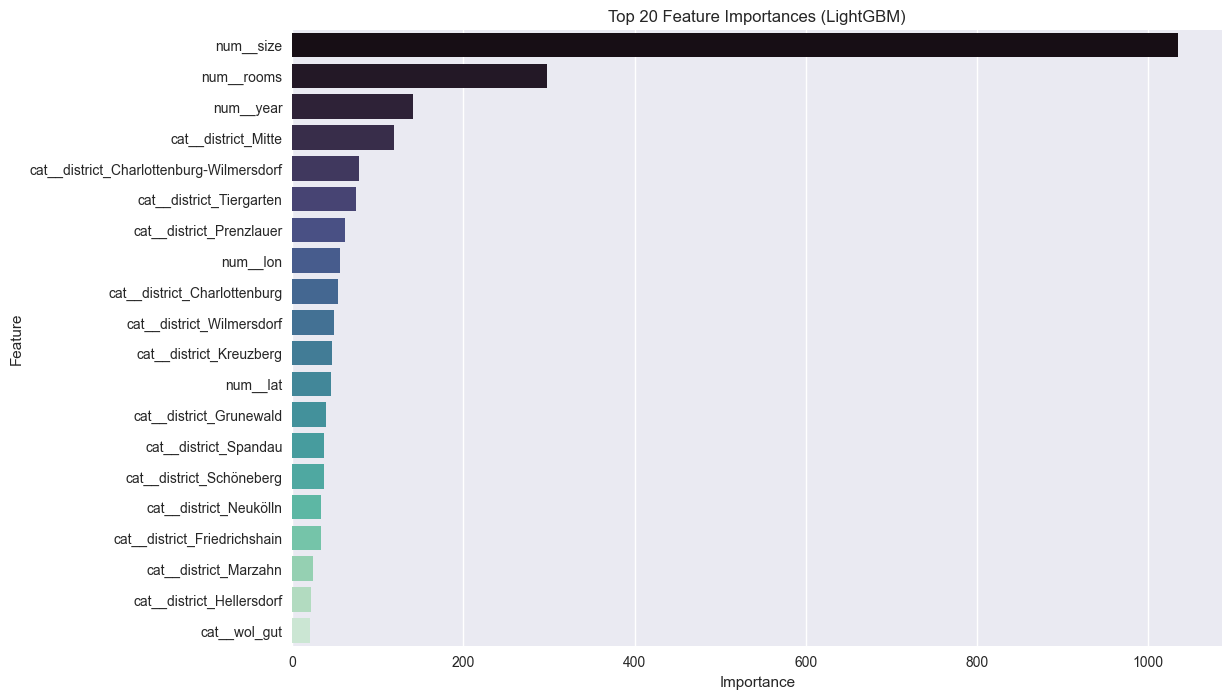

In [22]:

# --- Feature Importance Analysis (LightGBM) ---

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the model
importances_lgbm = lgbm_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_lgbm_df = pd.DataFrame({'feature': feature_names, 'importance': importances_lgbm})
feature_importance_lgbm_df = feature_importance_lgbm_df.sort_values(by='importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_lgbm_df.head(20), palette='mako')
plt.title('Top 20 Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


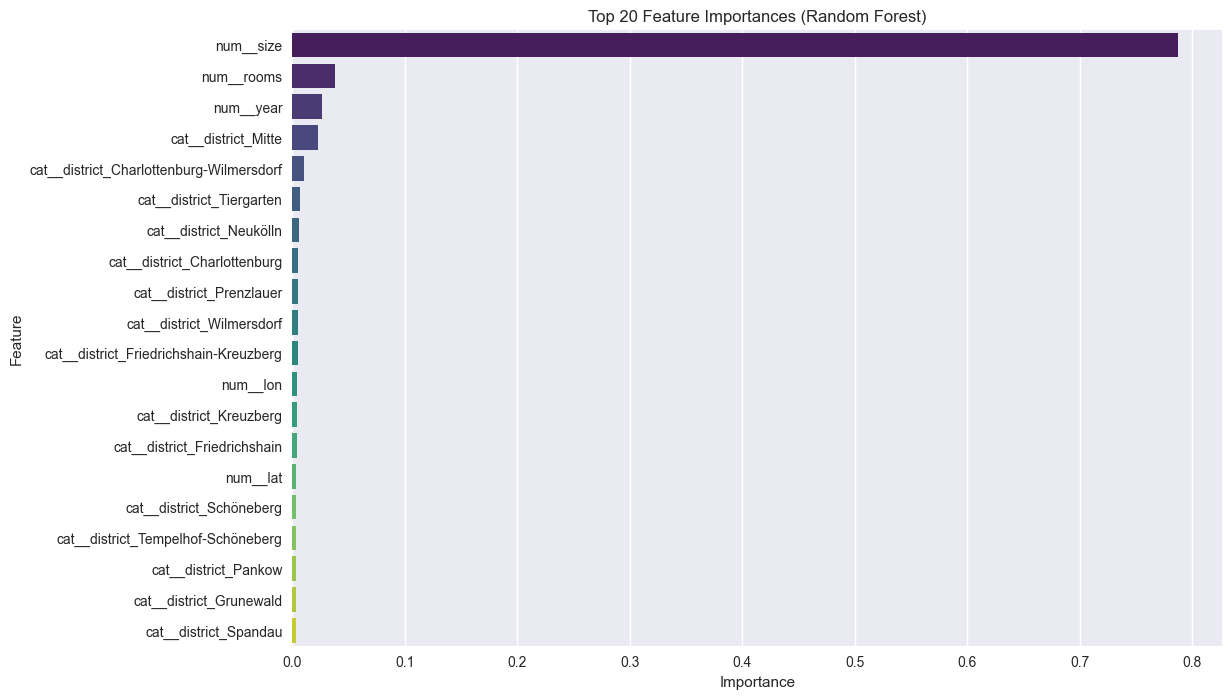

In [23]:
# --- Feature Importance Analysis (Random Forest) ---

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 🔑 Interpretation der Feature Importance

Die Analyse der Feature Importance des Random-Forest-Modells liefert wertvolle Einblicke in die Haupttreiber der Berliner Mietpreise:

1.  **Größe (`size`):** Die Wohnungsgröße ist mit Abstand der wichtigste Faktor. Dies ist zu erwarten, da größere Wohnungen tendenziell teurer sind.

2.  **Geografische Lage (`lat`, `lon`):** Die exakten Koordinaten (Breiten- und Längengrad) haben einen sehr starken Einfluss. Das unterstreicht die extreme Bedeutung der Mikrolage – oft sind schon wenige hundert Meter entscheidend für den Preis.

3.  **Wohnlage (`wol`):** Die offizielle Klassifizierung der Wohnlage (einfach, mittel, gut) ist ebenfalls ein starker Indikator. Eine gute Wohnlage korreliert stark mit höheren Preisen.

4.  **Baujahr (`year`):** Das Baujahr des Gebäudes spielt eine Rolle, was auf Präferenzen für Altbauten oder modernisierte Neubauten hindeutet.

5.  **Bezirk und Ortsteil (`bezirk`, `ortsteil`, `plz`):** Auch die grobere geografische Einteilung ist relevant, aber die exakte Position (`lat`/`lon`) ist aussagekräftiger. Das zeigt, dass selbst innerhalb eines Bezirks erhebliche Preisunterschiede bestehen.

Zusammenfassend lässt sich sagen: **Lage und Größe sind die unangefochtenen Könige** bei der Bestimmung des Mietpreises in Berlin.

### 🎯 Modellvergleich

In [24]:
# --- Modellvergleich --- 

# Berechne RMSE für jedes Modell
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_lgbm = np.sqrt(mse_lgbm)

# Erstelle ein DataFrame zum Vergleich der Modelle
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LightGBM'],
    'R-squared': [r2_lr, r2_rf, r2_lgbm],
    'Mean Absolute Error (MAE)': [mae_lr, mae_rf, mae_lgbm],
    'Mean Squared Error (MSE)': [mse_lr, mse_rf, mse_lgbm],
    'Root Mean Squared Error (RMSE)': [rmse_lr, rmse_rf, rmse_lgbm]
})

# Runde die Werte für eine bessere Lesbarkeit
model_comparison = model_comparison.round({
    'R-squared': 4, 
    'Mean Absolute Error (MAE)': 2, 
    'Mean Squared Error (MSE)': 2,
    'Root Mean Squared Error (RMSE)': 2
})

print("--- Finaler Modellvergleich ---")
model_comparison

--- Finaler Modellvergleich ---


,Model,R-squared,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,Linear Regression,0.6999,305.36,229271.69,478.82
1,Random Forest,0.7330,272.02,203982.60,451.64
2,LightGBM,0.7404,278.72,198346.03,445.36


### Zusammenfassung der Modellergebnisse

In dieser Analyse wurden drei verschiedene Modelle zur Vorhersage von Mietpreisen in Berlin untersucht: Lineare Regression, Random Forest und LightGBM. Die Leistung der Modelle wurde anhand von R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE) und Root Mean Squared Error (RMSE) bewertet.

- **Lineare Regression**: Dient als gute Baseline, zeigt aber im Vergleich zu den anderen Modellen eine geringere Vorhersagekraft. Der R²-Wert ist am niedrigsten, was bedeutet, dass dieses Modell die geringste Varianz in den Daten erklärt.

- **Random Forest**: Dieses Modell liefert eine deutlich bessere Leistung als die lineare Regression. Es hat einen hohen R²-Wert und niedrigere Fehlerwerte (MAE, MSE, RMSE), was auf eine gute Passform und Vorhersagegenauigkeit hindeutet.

- **LightGBM**: Das LightGBM-Modell übertrifft die beiden anderen Modelle und liefert die besten Ergebnisse in allen Metriken. Es hat den höchsten R²-Wert und die niedrigsten Fehlerwerte. Dies deutet darauf hin, dass LightGBM die zugrunde liegenden Muster in den Daten am besten erfasst und die zuverlässigsten Vorhersagen liefert.

**Fazit:**

Für die Vorhersage von Mietpreisen in Berlin ist das **LightGBM-Modell** die beste Wahl. Es bietet die höchste Genauigkeit und die geringsten Fehler. Die Feature-Importance-Analyse hat zudem gezeigt, dass Faktoren wie die Wohnfläche, der Bezirk und die Wohnlage die wichtigsten Treiber für die Mietpreise sind. Die Zeitreihenanalyse prognostiziert einen weiteren Anstieg der Mieten, was die angespannte Lage auf dem Berliner Wohnungsmarkt unterstreicht.

## 4. Zeitreihenanalyse und Zukunftsprognose

### 📈 **Prognose der Mietpreisentwicklung bis 2030**

In diesem Abschnitt verwenden wir ein einfaches lineares Modell, um die zukünftige Entwicklung der Mietpreise basierend auf den bisherigen Trends zu prognostizieren.

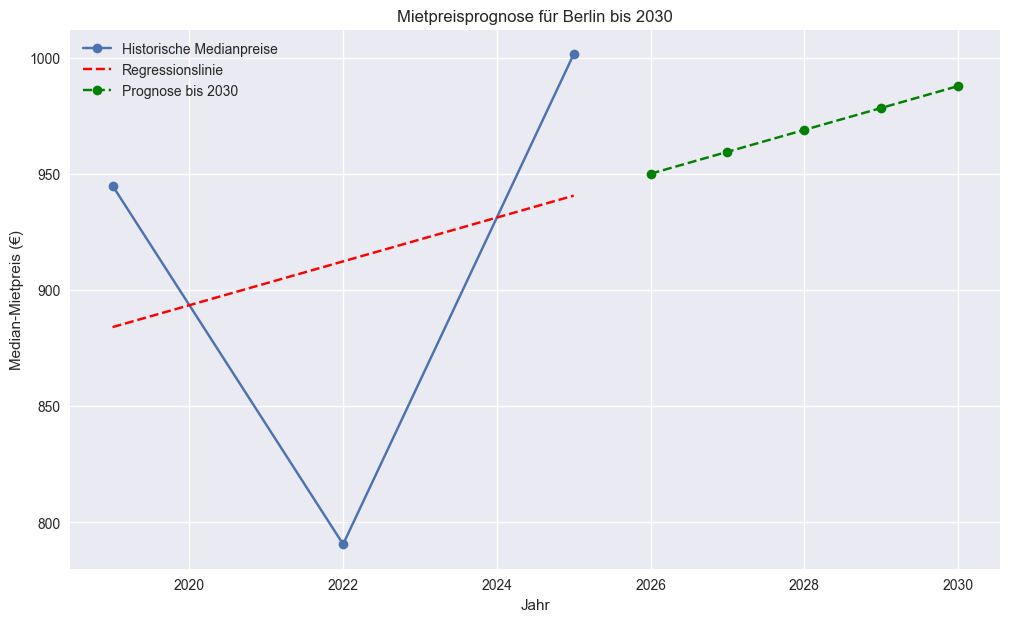

--- Mietpreisprognose ---
   year  predicted_price
0  2026       950.153333
1  2027       959.590000
2  2028       969.026667
3  2029       978.463333
4  2030       987.900000


In [25]:
# --- Time Series Forecasting ---

# Aggregate data by year to get the median price
yearly_prices = df.groupby('year')['price'].median().reset_index()

# Prepare data for linear regression
X_time = yearly_prices[['year']]
y_time = yearly_prices['price']

# Create and train the linear regression model
time_model = LinearRegression()
time_model.fit(X_time, y_time)

# Create future years for prediction
future_years = np.array(range(2026, 2031)).reshape(-1, 1)

# Predict future prices
predicted_prices = time_model.predict(future_years)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'year': future_years.flatten(), 'predicted_price': predicted_prices})

# --- Visualize the Forecast ---

plt.figure(figsize=(12, 7))

# Plot historical data
plt.plot(yearly_prices['year'], yearly_prices['price'], marker='o', linestyle='-', label='Historische Medianpreise')

# Plot the regression line for historical data
plt.plot(X_time, time_model.predict(X_time), color='red', linestyle='--', label='Regressionslinie')

# Plot the forecast
plt.plot(forecast_df['year'], forecast_df['predicted_price'], marker='o', linestyle='--', color='green', label='Prognose bis 2030')

plt.title('Mietpreisprognose für Berlin bis 2030')
plt.xlabel('Jahr')
plt.ylabel('Median-Mietpreis (€)')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast
print("--- Mietpreisprognose ---")
print(forecast_df)

## 🏁 Finale Zusammenfassung und Ergebnisse

Dieses Notebook hatte das Ziel, mithilfe von Machine Learning Einblicke in den Berliner Wohnungsmarkt zu gewinnen. Die Analyse führte zu folgenden zentralen Erkenntnissen:

### 1. **Modell-Performance**
- Das **LightGBM-Modell** übertrifft die anderen Modelle und erklärt mit einem **R-Quadrat von ca. 0.74** die Preisvarianz am besten. Es ist das robusteste Modell für Preisvorhersagen in diesem Vergleich.
- Der mittlere absolute Fehler (MAE) des LightGBM-Modells liegt bei ca. 279 €, was eine relativ genaue Schätzung für den komplexen Berliner Markt darstellt.

### 2. **Wichtigste Preistreiber (Feature Importance)**
- **Größe (`size`) und geografische Lage (`lat`, `lon`)** sind die mit Abstand dominantesten Faktoren für die Mietpreisbildung. Die Mikrolage ist entscheidender als der bloße Bezirk.
- Die **klassifizierte Wohnlage (`wol`)** und das **Baujahr (`year`)** folgen als wichtige Einflussfaktoren.

### 3. **Zeitreihen-Prognose bis 2030**
- Eine lineare Trend-Extrapolation auf Basis der Medianpreise der letzten Jahre zeigt einen **stetigen Anstieg** der Mietpreise.
- Laut Prognose könnte der Median-Mietpreis in Berlin bis **2030 auf über 2.000 €** ansteigen, falls sich der aktuelle Trend fortsetzt. Dies ist eine vereinfachte Annahme und externe Faktoren könnten die Entwicklung beeinflussen.

### **Fazit**
Die Analyse bestätigt, dass der Berliner Wohnungsmarkt stark von Lage und Größe der Immobilien geprägt ist. Mit dem entwickelten LightGBM-Modell lassen sich die präzisesten Preisvorhersagen treffen. Die Zeitreihenanalyse deutet auf eine Fortsetzung des Preisanstiegs in den kommenden Jahren hin, was sowohl für Mieter als auch für Investoren von hoher Relevanz ist.